In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pnn.layer.input import InputLayer
from pnn.tensor import Tensor
from pnn.layer.fully_connected import FullyConnected
from pnn.layer.convolution import Conv2DLayer
from pnn.layer.pooling import Pooling2DLayer
from pnn.layer.flatten import FlattenLayer
from pnn.layer.activation import ActivationLayer, sigmoid, soft_max, relu
from pnn.layer.loss import LossLayer, mean_squared_error, cross_entropy
from pnn.network import Network
from pnn.trainer import Trainer, sgd
from pnn.shape import Shape
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision.datasets import MNIST

In [18]:
in_shape=Shape((4, 3, 2))
out_shape=Shape((3, 2, 2))
kernel_size=Shape((2, 2))
num_filters=2

weights = Tensor(
            elements=np.array(
                [[[ [ 0.1, 0.37],
                    [ 0.7, 0.9 ]],

                    [[ 0.3, 0.32],
                    [ 0.9, 0.2 ]]],


                    [[[-0.2, -0.9 ],
                    [ 0.6, 0.3 ]],

                    [[ 0.4, 0.17],
                    [-1.1, -0.7 ]]]]
            )
        )

tensor = Tensor(
            elements=np.array(
                [[  [ 0.1, 0.9 ],
                    [ 1.2, 1.1 ],
                    [ 0.01, 3.2 ]],

                    [[-0.2, 0.3 ],
                    [ 1.4, 0.7 ],
                    [ 0.2, 1.7 ]],

                    [[ 0.5, 0.5 ],
                    [ 1.6, 2.2 ],
                    [-0.3, 6.3 ]],

                    [[ 0.6, 0.65],
                    [ 2.2, 4.4 ],
                    [ 4., 8.2 ]]]
            )
        )

out_tensors = [Tensor(elements=np.zeros((3, 2, 2), dtype=np.float64))]

In [104]:
for x in range(len(tensor.elements) - kernel_size.shape[0] + 1):
    # print(len(tensor.elements))
    # print(len(tensor.elements) - kernel_size.shape[0] + 1)
    for y in range(len(tensor.elements[0]) - kernel_size.shape[1] + 1):
        for z in range(num_filters):
            # print(f'{x}, {y}, {z}')
            # out_tensors[i].elements[x][y][z] = np.sum([np.multiply(tensor.elements[x + i][y + j][a], weights.elements[i][j][a][z]) 
            out_tensors[0].elements[x][y][z] = np.sum([np.multiply(tensor.elements[x + i][y + j][a], weights.elements[i][j][a][z]) 
                                                        for j in range(kernel_size.shape[0]) 
                                                        for i in range(kernel_size.shape[1]) 
                                                        for a in range(in_shape.shape[2])])
            
            l1 = [tensor.elements[x + i][y + j][a]
                                                        for j in range(kernel_size.shape[0]) 
                                                        for i in range(kernel_size.shape[1]) 
                                                        for a in range(in_shape.shape[2])]
            l2 = [weights.elements[i][j][a][z]
                                                        for j in range(kernel_size.shape[0]) 
                                                        for i in range(kernel_size.shape[1]) 
                                                        for a in range(in_shape.shape[2])]
            
            l3 = tensor.elements[x: x + kernel_size.shape[1]][y: y + kernel_size.shape[0]][0: in_shape.shape[2]]
            l4 = weights.elements[0: kernel_size.shape[1]][0: kernel_size.shape[0]][0: in_shape.shape[2]][z]
            # out_tensors[i].elements[x][y][z] = np.sum(np.multiply(tensor.elements[x: x + kernel_size.shape[1]][y: y + kernel_size.shape[0]][0: in_shape.shape[2]],
            #                                           weights.elements[0: kernel_size.shape[1]][0: kernel_size.shape[0]][0: in_shape.shape[2]][z]))


In [128]:
a1 = np.array([[1,1,1, 1], [1,1,1,1 ]])
a2 = np.array([[2,2], [2,2]])

In [133]:
a1[0:2, 1:3] 

array([[2, 2],
       [2, 2]])

In [130]:
a1

array([[1, 2, 2, 1],
       [1, 2, 2, 1]])

# Items

In [110]:
train_data = MNIST(
    root = 'data',
    train = True,
    download = True                                    
)
train_images = np.divide(np.array(train_data.data), np.max(np.array(train_data.data)))
train_labels = np.array(train_data.targets)

test_data = MNIST(
    root = 'data', 
    train = False, 
    download = True  
)
test_images = np.divide(np.array(test_data.data), np.max(np.array(test_data.data)))
test_labels = np.array(test_data.targets)

train_images = train_images[0:10000]
train_labels = train_labels[0:10000]
test_images = test_images[0:1000]
test_labels = test_labels[0:1000]

In [106]:
train_labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

# Convolution

In [143]:
conv1 = Conv2DLayer(kernel_size=Shape((3,3)), num_filters=1)
maxpool1 = Pooling2DLayer(kernel_size=Shape((2,2)), pooling_type='max')
flatten = FlattenLayer()
# fully_connected_1 = FullyConnected(out_shape=Shape((784,)), initialization_technique='sigmoid')
# activation_layer_sigmoid1 = ActivationLayer(sigmoid)
fully_connected_2 = FullyConnected(out_shape=Shape((169,)), initialization_technique='sigmoid')
activation_layer_sigmoid2 = ActivationLayer(sigmoid)
# fully_connected_3 = FullyConnected(out_shape=Shape((49,)), initialization_technique='sigmoid')
# activation_layer_sigmoid3 = ActivationLayer(sigmoid)
fully_connected_4 = FullyConnected(out_shape=Shape((10,)), initialization_technique='softmax') 
activation_layer_soft_max = ActivationLayer(soft_max)
loss_layer = LossLayer(cross_entropy)
layerlist = [conv1,
             maxpool1,
             flatten,
             #fully_connected_1, activation_layer_sigmoid1, 
             fully_connected_2, activation_layer_sigmoid2,
            #  fully_connected_3, activation_layer_sigmoid3,
             fully_connected_4, activation_layer_soft_max, loss_layer]
network = Network(layerlist, type = 'convolutional')

sgd_trainer = Trainer(
    learning_rate=0.03,
    amount_epochs=1,
    update_mechanism=sgd,
    #shuffle=False,
    batch_size=1)

In [144]:
sgd_trainer.optimize(network=network, data=train_images, labels=train_labels)


100%|██████████| 10000/10000 [04:12<00:00, 39.66it/s]

epoche: 0, loss: 0.5133, time: 252.1889s


# Trainer

In [11]:
# fully_connected_1 = FullyConnected(out_shape=Shape((784,)), initialization_technique='sigmoid')
# activation_layer_sigmoid1 = ActivationLayer(sigmoid)
fully_connected_2 = FullyConnected(out_shape=Shape((196,)), initialization_technique='sigmoid')
activation_layer_sigmoid2 = ActivationLayer(sigmoid)
# fully_connected_3 = FullyConnected(out_shape=Shape((49,)), initialization_technique='sigmoid')
# activation_layer_sigmoid3 = ActivationLayer(sigmoid)
fully_connected_4 = FullyConnected(out_shape=Shape((10,)), initialization_technique='softmax') 
activation_layer_soft_max = ActivationLayer(soft_max)
loss_layer = LossLayer(cross_entropy)
layerlist = [#fully_connected_1, activation_layer_sigmoid1, 
             fully_connected_2, activation_layer_sigmoid2,
            #  fully_connected_3, activation_layer_sigmoid3,
             fully_connected_4, activation_layer_soft_max, loss_layer]
network = Network(layerlist)

sgd_trainer = Trainer(
    learning_rate=0.03,
    amount_epochs=1,
    update_mechanism=sgd,
    batch_size=1,
    shuffle=False)

In [12]:
sgd_trainer.optimize(network=network, data=train_images, labels=train_labels)

100%|██████████| 100/100 [00:00<00:00, 780.59it/s]

(196,)
(196,)
(196,)
(196,)
(196,)
(196,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
epoche: 0, loss: 2.6788, time: 0.1301s


In [32]:
network.labels[0].elements

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

# Accuracy

In [7]:
prediction

array([0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 4, 0, 0,
       4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [109]:
prediction = network.predict(test_images)
avg_time = np.round(np.average(sgd_trainer.parameters['time']))
prediction_acc = sum(prediction == test_labels)/len(test_labels)
print(prediction_acc)

0.654


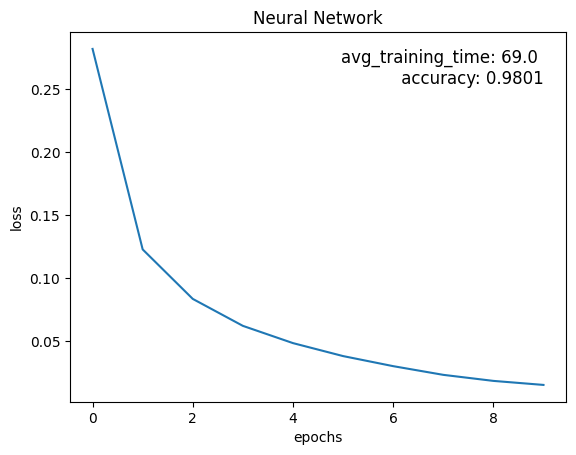

In [37]:
plt.plot(sgd_trainer.parameters['loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.text(max(sgd_trainer.parameters['epoche']), max(sgd_trainer.parameters['loss']), f'avg_training_time: {avg_time} \n accuracy: {prediction_acc}', fontsize=12, color='black', ha='right', va='top')
plt.title('Neural Network')
plt.savefig('Neural Network')
plt.show()

# Save and load

In [8]:
network.save_network('./networks/neural_network_2_layer')

In [32]:
n = Network.load_network('./networks/neural_network')

In [30]:
prediction = n.predict(test_images)
print(sum(prediction == test_labels)/len(test_labels))

0.9519


# Network

In [67]:
fully_connected_1 = FullyConnected(out_shape=Shape((15,)), initialization_technique='sigmoid')
activation_layer_sigmoid = ActivationLayer(sigmoid)
fully_connected_2 = FullyConnected(out_shape=Shape((10,)), initialization_technique='softmax') 
activation_layer_soft_max = ActivationLayer(soft_max)
loss_layer = LossLayer(mean_squared_error)
layerlist = [fully_connected_1, activation_layer_sigmoid, fully_connected_2, activation_layer_soft_max, loss_layer]
network = Network(layerlist)

In [43]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [87]:
output = network.forward(train_images, train_labels,unique_length=10)
output

0.11209011367433079

In [70]:
network.tensorlist[2][0].elements

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.33377769e-74,
       4.14081228e-05, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 3.45260849e-25, 1.00000000e+00,
       1.00000000e+00, 9.99973057e-01, 9.99999372e-01])

In [71]:
network.backprop()

In [74]:
network.tensorlist[1][0].elements

array([  27.69562386,  171.75035953,  313.72672599, -170.10328159,
        -10.09199209,   87.46834609,   94.59948139,  154.94512526,
        181.95918689,  251.6944964 ,  -56.3254973 ,  199.59030414,
        181.73033401,   10.52174898,   14.28127379])

In [86]:
for i in network.layers[0].weights.deltas:
    if np.max(i) > 0:
        print(i)

[ 1.65874242e-14  0.00000000e+00  0.00000000e+00 -4.16890222e-77
  3.36041250e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.61056219e-27  0.00000000e+00
  0.00000000e+00  8.18070301e-07  3.02447427e-09]
[ 9.95245452e-14  0.00000000e+00  0.00000000e+00 -2.50134133e-76
  2.01624750e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.66337314e-27  0.00000000e+00
  0.00000000e+00  4.90842181e-06  1.81468456e-08]
[ 9.95245452e-14  0.00000000e+00  0.00000000e+00 -2.50134133e-76
  2.01624750e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.66337314e-27  0.00000000e+00
  0.00000000e+00  4.90842181e-06  1.81468456e-08]
[ 9.95245452e-14  0.00000000e+00  0.00000000e+00 -2.50134133e-76
  2.01624750e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.66337314e-27  0.00000000e+00
  0.00000000e+00  4.90842181e-06  1.81468456e-08]
[ 6.96671817e-13  0.

# Input Layer

In [ ]:
input_layer = InputLayer()
input_tensorlist = input_layer.forward(train_images)

# Fully Connected 1

In [ ]:
out_shape=(100,)
fully_connected = FullyConnected(out_shape=out_shape)
out_tensor_fully_connected1 = np.array([Tensor(np.random.rand(out_shape[0]), None) for j in range(0, len(input_tensorlist))])
fully_connected.forward(in_tensors=input_tensorlist, out_tensors=out_tensor_fully_connected1)

In [ ]:
out_tensor_fully_connected1[0].elements

array([13855.32327516, 14567.87946531, 12531.64266387, 13065.09199568,
       13717.27042773, 13144.85267195, 14172.86492735, 13344.64554154,
       13789.30046119, 13234.91262216, 14386.86711745, 14110.44445943,
       14011.03393467, 13626.79211007, 14183.92327854, 13196.15787959,
       12533.8216709 , 14009.36439561, 14305.71061599, 14244.94249371,
       13756.82421686, 14248.35678187, 13694.60728455, 13465.37950326,
       13765.26222772, 14410.22192256, 13453.50571786, 13971.10785787,
       13484.35685788, 12655.63794863, 12429.55267367, 14555.04290196,
       13832.72866545, 14343.43362097, 13755.93510764, 13823.52715719,
       13342.75422834, 12687.45679859, 13605.87063681, 13682.76244315,
       13272.07845833, 12832.37884452, 14254.27618778, 12977.85169336,
       15051.38516363, 14307.03311969, 14245.05595451, 12788.95005566,
       13792.19609532, 13385.96231409, 13881.2569936 , 13664.41136983,
       14123.34368646, 13645.73949912, 14719.56784325, 13915.15399392,
      

# Sigmoid

In [ ]:
activation_layer = ActivationLayer(sigmoid)
out_tensor_activation = np.array([Tensor(np.random.rand(out_shape[0]), None) for j in range(0, len(input_tensorlist))])
activation_layer.forward(out_tensor_fully_connected1, out_tensor_activation)

In [ ]:
sigmoid_layer = ActivationLayer(sigmoid)

In [ ]:
in_tensors = [Tensor(elements=np.array([1, 2, 3, 4], dtype=np.float64))]
out_tensors = [Tensor(elements=np.array([0, 0, 0, 0], dtype=np.float64))]
out_tensors[0].deltas = np.array([6, 7, 8, 9])
expected_output = [1.1796716, 0.7349551, 0.36141328, 0.15896436]

sigmoid_layer.forward(in_tensors, out_tensors)
sigmoid_layer.backward(out_tensors, in_tensors)

In [ ]:
in_tensors[0].deltas

array([1.1796716 , 0.7349551 , 0.36141328, 0.15896436])

# Fully Connected 2

In [ ]:
out_shape=(10,)
fully_connected = FullyConnected(out_shape=out_shape)
out_tensor_fully_connected2 = np.array([Tensor(np.random.rand(out_shape[0]), None) for j in range(0, len(input_tensorlist))])
fully_connected.forward(in_tensors=out_tensor_activation, out_tensors=out_tensor_fully_connected2)

In [ ]:
out_tensor_fully_connected2[0].elements

array([21.53422881, 23.77821393, 21.3411817 , 23.2444338 , 22.3820653 ,
       20.77149952, 22.49382576, 19.6519166 , 23.03132047, 19.78697478])

# Soft Max

In [ ]:
activation_layer = ActivationLayer(soft_max)
out_tensor_activation = np.array([Tensor(np.random.rand(out_shape[0]), None) for j in range(0, len(input_tensorlist))])
activation_layer.forward(out_tensor_fully_connected2, out_tensor_activation)

In [ ]:
print(len(out_tensor_activation[0].elements))
out_tensor_activation[0].elements

10


array([0.03704778, 0.34939171, 0.03054379, 0.20487777, 0.08649141,
       0.01727878, 0.09671858, 0.00564007, 0.16555446, 0.00645564])

# Mean Squared Error

In [ ]:
mse_layer = LossLayer(mean_squared_error)
cross_entropy_layer = LossLayer(loss=cross_entropy)
pred = [Tensor(elements=np.array([0.1, 0.2, 0.3, 0.4], dtype=np.float64))]
target = [Tensor(elements=np.array([1, 0, 0, 0], dtype=np.float64))]
mse = mse_layer.forward(targets=target, predictions=pred)
cross_entropy_val = cross_entropy_layer.forward(targets=target, predictions=pred)

In [ ]:
cross_entropy_val

2.3025850929940455

## conv forward

In [32]:
in_shape=Shape((4, 3, 2))
out_shape=Shape((3, 2, 2))
kernel_size=Shape((2, 2))
num_filters=2
weights = Tensor(
            elements=np.array(
                [[[ [ 0.1, 0.37],
                    [ 0.7, 0.9 ]],

                    [[ 0.3, 0.32],
                    [ 0.9, 0.2 ]]],


                    [[[-0.2, -0.9 ],
                    [ 0.6, 0.3 ]],

                    [[ 0.4, 0.17],
                    [-1.1, -0.7 ]]]]
            )
        )
out_tensor = Tensor(
            elements=np.array(
                [   [[ 2.,      1.469 ],
                    [ 2.123,  -0.1288]],

                    [[-0.34,   -0.784 ],
                    [-3.83,   -3.689 ]],

                    [[-0.83,   -1.464 ],
                    [ 2.06,   -1.984 ]]],
                dtype=np.float64,
            )
        )

out_tensor.deltas = np.array(
            [[  [ 0.1,  -0.5 ],
                [-0.25, -0.8 ]],

                [[ 0.33,  0.2 ],
                [ 1.3,   0.81]],

                [[-0.6,   0.1 ],
                [ 0.01,  1.1 ]]],
            dtype=np.float64,
        )
in_tensor = Tensor(
            elements=np.array(
                [[  [ 0.1, 0.9 ],
                    [ 1.2, 1.1 ],
                    [ 0.01, 3.2 ]],

                    [[-0.2, 0.3 ],
                    [ 1.4, 0.7 ],
                    [ 0.2, 1.7 ]],

                    [[ 0.5, 0.5 ],
                    [ 1.6, 2.2 ],
                    [-0.3, 6.3 ]],

                    [[ 0.6, 0.65],
                    [ 2.2, 4.4 ],
                    [ 4., 8.2 ]]]
            )
        )

In [160]:
output_arr = []
for y in range(len(tensor.elements) - kernel_size.shape[0] + 1):
    y_arr = []
    for x in range(len(tensor.elements[0]) - kernel_size.shape[1] + 1):
        x_arr = []
        for z in range(num_filters):
            #for a in range(in_shape.shape[2]):
                #for i in range(kernel_size.shape[0]):
                #    for j in range(kernel_size.shape[1]):
                        #print(tensor.elements[y + i][x + j][a])
                        #print(weights.elements[i][j][a][z])
                        #c.append(np.multiply(tensor.elements[y + i][x + j][a], weights.elements[i][j][a][z]))
            channel_value = np.sum([np.multiply(tensor.elements[y + i][x + j][a], weights.elements[i][j][a][z]) for j in range(kernel_size.shape[1]) for i in range(kernel_size.shape[0]) for a in range(in_shape.shape[2])])
                #channel_values = np.sum(channel_values, axis=0)
            x_arr.append(channel_value)
        y_arr.append(x_arr)
    output_arr.append(y_arr)
#out_tensors[0].elements = np.array(output_arr)

## Conv backward

In [78]:
# maybe always equals the input shape
padding_x = kernel_size.shape[0] - 1
padding_y = kernel_size.shape[1] - 1
output_x = out_shape.shape[0] + 2 * padding_x - (kernel_size.shape[0] - 1)
output_y = out_shape.shape[1] + 2 * padding_y - (kernel_size.shape[1] - 1)
padded_shape = (output_x, output_y, out_shape.shape[2])
padded_array = np.zeros(padded_shape)

padded_array = np.zeros(in_shape.shape)
for x in range(out_shape.shape[0]):
    for y in range(out_shape.shape[1]):
        for z in range(num_filters):
            padded_array[x + padding_x][y + padding_y][z] = out_tensor.deltas[x][y][z]

rotated_filter = np.zeros(shape=weights.shape)
for z in range(num_filters):
    for a in range(in_shape.shape[2]):
        for i in range(kernel_size.shape[1]):
            for j in range(kernel_size.shape[0]):
                # print(weights.elements[i][j][a][z])
                # print(weights.elements[(kernel_size.shape[1]-1)-i][(kernel_size.shape[0]-1)-j][a][z])
                rotated_filter[i][j][a][z] = weights.elements[(kernel_size.shape[1]-1)-i][(kernel_size.shape[0]-1)-j][a][z]
                #weights.elements[i][j][a][z]

in_tensor.deltas = np.zeros(in_tensor.shape)
# for x in range(len(padded_array) - kernel_size.shape[0] + 1):
for x in range(len(padded_array)):
 #    for y in range(len(padded_array[0]) - kernel_size.shape[1] + 1):
    for y in range(len(padded_array[0])):
        for a in range(in_tensor.shape[2]):
            for i in range(kernel_size.shape[0]):
                for j in range(kernel_size.shape[1]):
                    if x + i < len(padded_array) and y + j <len(padded_array[0]):
                        in_tensor.deltas[x][y][a] = in_tensor.deltas[x][y][a] + np.dot(padded_array[x + i][y + j], rotated_filter[i][j][a])
                        print(f'x:{x} y:{y} i:{i} j:{j}')
                        print(padded_array[x + i][y + j])
                        print(rotated_filter[i][j][a])
                        print(np.dot(padded_array[x + i][y + j], rotated_filter[i][j][a]))
                    
                    # print(weights.elements[i][j][a])

In [126]:
weights.deltas = np.zeros(weights.shape)
for filter in range(num_filters):
    for i in range(kernel_size.shape[0]):
        for j in range(kernel_size.shape[1]):
            for a in range(in_tensor.shape[2]):
                for x in range(len(in_tensor.elements) - kernel_size.shape[0] + 1):
                    for y in range(len(in_tensor.elements[0]) - kernel_size.shape[1] + 1):
                        weights.deltas[i][j][a][filter] = weights.deltas[i][j][a][filter] + in_tensor.elements[x + i][y + j][a] * out_tensor.deltas[x][y][filter]
                        # print(f'{in_tensor.elements[x + i][y + j][a]} * {out_tensor.deltas[x][y][0]}')